In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset directory
dataset_dir="E:\Facial_Expression_Dataset"

# Load dataset and split into training and validation
train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 20% for validation/test
    subset="training",
    seed=123,  # Ensures reproducibility
    image_size=(150, 150),  # Resize images to 150x150
    labels="inferred",
    label_mode="int",
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    labels="inferred",
    label_mode="int",
    batch_size=32
)

class_names = train_ds.class_names
print("Class Names:", class_names)



Found 8987 files belonging to 3 classes.
Using 7190 files for training.
Found 8987 files belonging to 3 classes.
Using 1797 files for validation.
Class Names: ['Angry', 'Happy', 'Sad']


In [12]:
def normalize(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

In [13]:
train_ds=train_ds.map(normalize)
val_ds=val_ds.map(normalize)

In [14]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),  # Ensure this matches
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])


In [15]:
history=model.fit(train_ds,epochs=7,validation_data=val_ds)

Epoch 1/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 433ms/step - accuracy: 0.4578 - loss: 1.0323 - val_accuracy: 0.5159 - val_loss: 0.9042
Epoch 2/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 210s 738ms/step - accuracy: 0.6088 - loss: 0.8200 - val_accuracy: 0.7206 - val_loss: 0.6603
Epoch 3/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 220s 973ms/step - accuracy: 0.7648 - loss: 0.5721 - val_accuracy: 0.7574 - val_loss: 0.5953
Epoch 4/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 209s 926ms/step - accuracy: 0.8255 - loss: 0.4262 - val_accuracy: 0.7930 - val_loss: 0.5419
Epoch 5/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 221s 978ms/step - accuracy: 0.8638 - loss: 0.3285 - val_accuracy: 0.8058 - val_loss: 0.4879
Epoch 6/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 177s 778ms/step - accuracy: 0.9027 - loss: 0.2492 - val_accuracy: 0.8136 - val_loss: 0.5356
Epoch 7/7
225/225 ━━━━━━━━━━━━━━━━━━━━ 198s 875ms/step - accuracy: 0.9344 - loss: 0.1693 - val_accuracy: 0.8013 - val_loss: 0.6570


In [16]:
# Save the entire model (architecture + weights + optimizer state)
model.save("model.h5")  # Save it as an HDF5 file


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


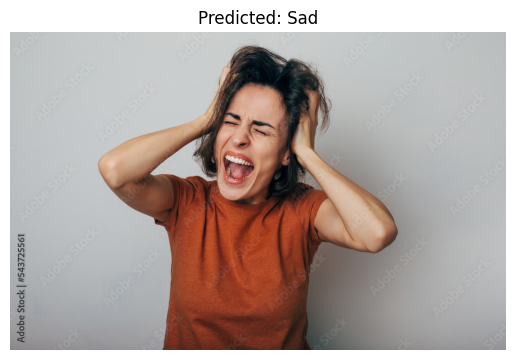

Predicted Class: Sad


In [17]:
class_names = ['Angry', 'Happy', 'Sad', 'Surprise']
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1: Load the saved model
# Step 2: Preprocess the image
def preprocess_image(image_path, target_size=(150, 150)):
    # Load the image with the target size
    img = image.load_img(image_path, target_size=target_size)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the input shape expected by the model (batch dimension)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image to [0, 1] if the model was trained on normalized images
    img_array = img_array / 255.0
    
    return img_array

# Example image path (update with your own image path)
image_path = r"E:\Machine Learning\Image Classification\image.png" # Replace with your image path

# Step 3: Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Step 4: Make the prediction
predictions = model.predict(preprocessed_image)

# Step 5: Get the predicted class label
# Assuming you have a classification with 5 classe

# Get the index of the predicted class (class with the highest probability)
predicted_class_index = np.argmax(predictions, axis=1)

# Map the index to the actual class name
predicted_class = class_names[predicted_class_index[0]]

# Step 6: Display the image with the predicted class label
img = cv2.imread(image_path)

# Convert the image from BGR (OpenCV) to RGB (Matplotlib)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Display the title with the predicted class
plt.title(f"Predicted: {predicted_class}")

# Hide axis for a cleaner display
plt.axis('off')
plt.show()

# Step 7: Print the predicted class
print(f"Predicted Class: {predicted_class}")
